In [1]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import dask.dataframe as dd
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_uh_201027_DO5/neuron_activations_cnn_20200504_000_val.csv')
df.time = df.time.astype('datetime64[ns]').reset_index(drop=True) - pd.Timedelta(6, 'H') # convert to datetime64 object and offset from UTC time by 6 hours
df.describe()

,index,centroid_lon,centroid_lat,centroid_i,centroid_j,track_id,track_step,neuron_000,neuron_001,neuron_002,neuron_003,neuron_004,neuron_005,neuron_006,neuron_007,neuron_008
count,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000
mean,93591.500000,-91.936123,38.184899,512.676789,953.536413,760.630828,1.831417,-0.067685,0.386064,-0.001853,0.223893,-0.078472,-0.072784,0.198383,-0.039618,0.538783
std,54035.510731,9.784797,5.036332,185.785259,279.046159,512.925881,1.223256,0.000511,0.089659,0.000054,0.087211,0.000800,0.000590,0.097769,0.000703,0.069353
min,0.000000,-124.432205,24.692507,41.000000,49.000000,0.000000,1.000000,-0.081953,-0.229283,-0.001882,-0.416302,-0.100531,-0.089305,-0.579063,-0.058907,-0.125056
25%,46795.750000,-98.237195,34.247490,365.000000,768.000000,337.000000,1.000000,-0.067613,0.393197,-0.001876,0.221265,-0.078357,-0.072701,0.181909,-0.039517,0.547852
50%,93591.500000,-90.886940,37.986687,507.000000,982.000000,692.000000,1.000000,-0.067564,0.410963,-0.001871,0.262264,-0.078265,-0.072643,0.242986,-0.039433,0.554102
75%,140387.250000,-85.001309,42.037640,659.000000,1159.000000,1109.000000,2.000000,-0.067533,0.417700,-0.001857,0.273175,-0.078219,-0.072608,0.259483,-0.039394,0.557495
max,187183.000000,-67.522270,49.320774,944.000000,1538.000000,2443.000000,19.000000,-0.065543,1.248651,-0.000438,0.297251,-0.074999,-0.070431,0.293115,-0.036645,1.048146


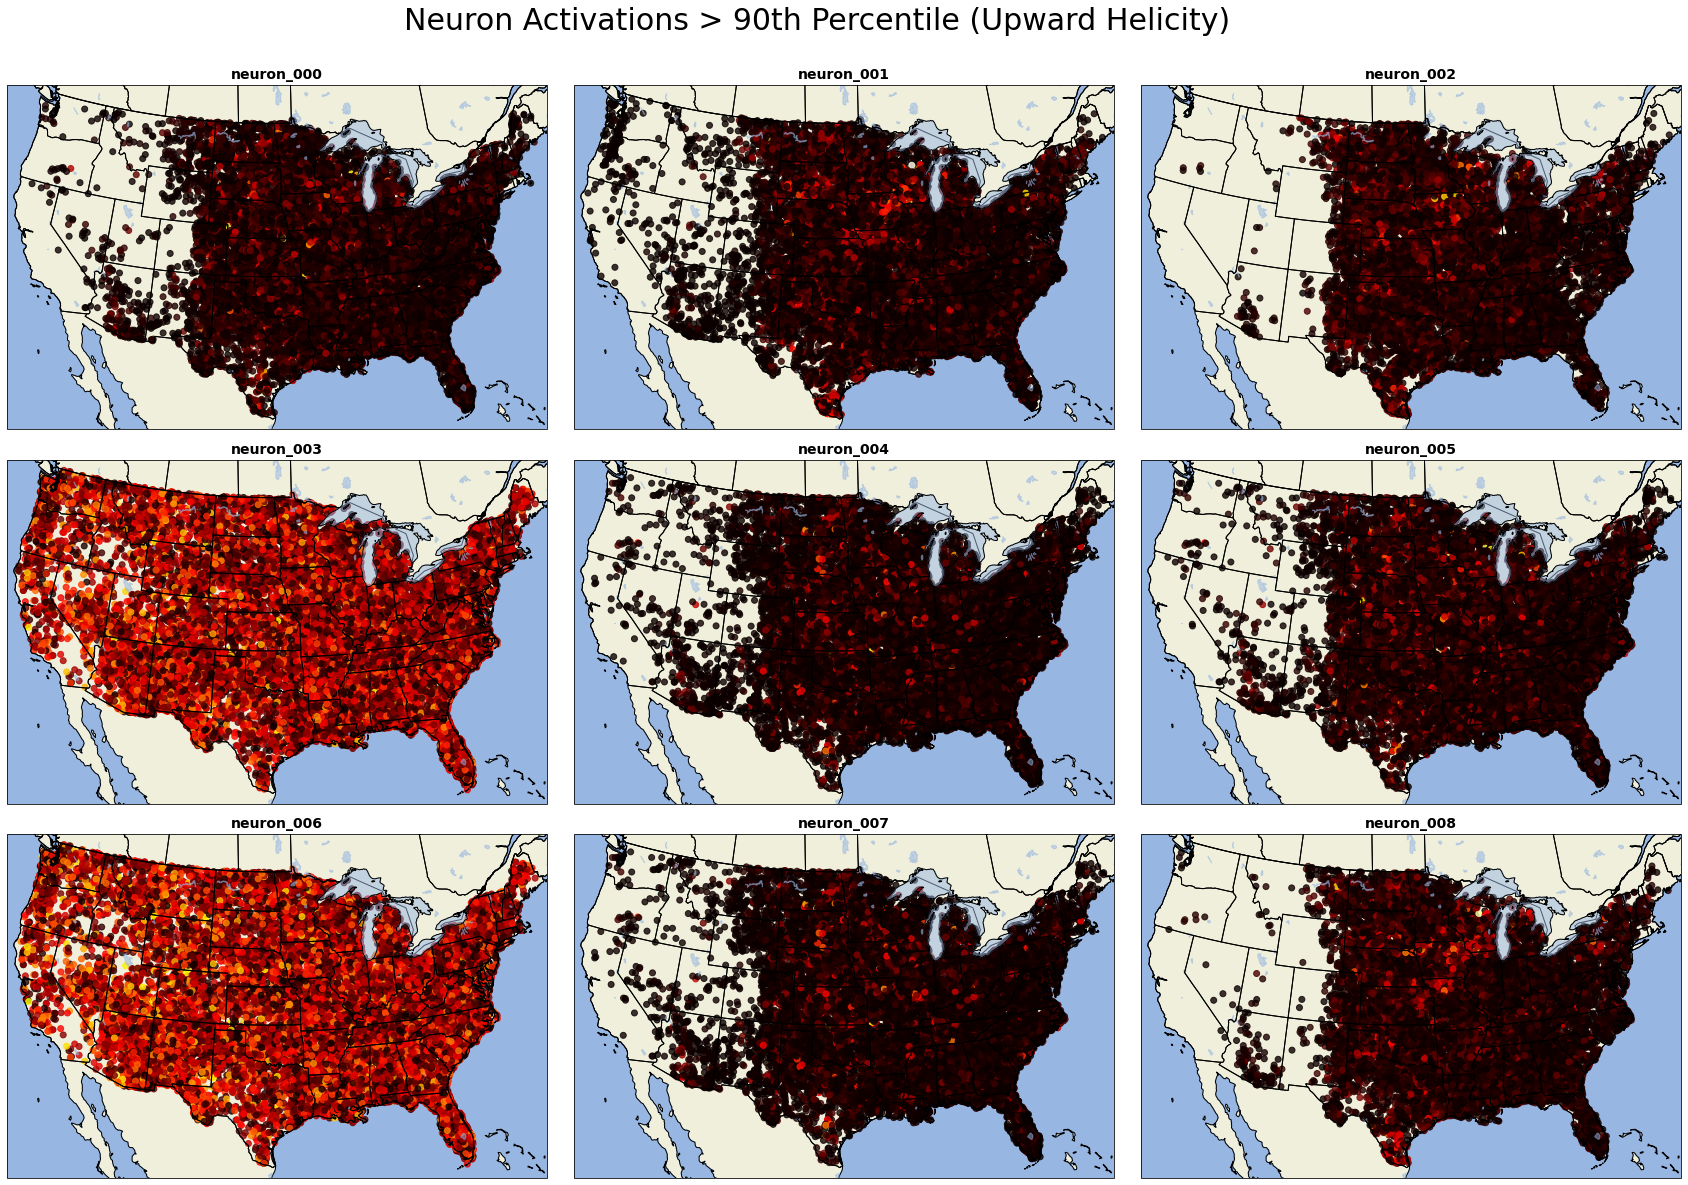

In [6]:
lcc = ccrs.LambertConformal(central_longitude=-97.5, standard_parallels=(38.5, 38.5))
fig, axes = plt.subplots(3,3, figsize=(30, 19.6), sharex=True, sharey=True, subplot_kw={'projection': lcc})
plt.subplots_adjust(wspace=0.05, hspace=-0.1)
neurons = list(df.columns[-9:])
for i, ax in enumerate(axes.ravel()):
    ax.set_extent([-120, -74, 25, 50], crs=ccrs.PlateCarree()) 
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    
    neuron = neurons[i]
    #data = df[df[neuron] < df[neuron].quantile(0.1)]
    data = df[df[neuron] > df[neuron].quantile(0.90)]
    var = data[neuron]
    #vmax = data.iloc[:,-4:].max().max()
    #vmin = data.iloc[:,-4:].min().min()
    vmin = var.quantile(0)
    vmax = var.quantile(1)
    im = ax.scatter(data['centroid_lon'], data['centroid_lat'], c=var, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(), alpha=0.8, cmap='hot')
    ax.set_title(neuron, fontsize=14, fontweight='bold')
    
#fig.subplots_adjust(right=0.87)
#cbar_ax = fig.add_axes([0.88, 0.132, 0.015, 0.74])
#fig.colorbar(im, cax=cbar_ax)
fig.suptitle('Neuron Activations > 90th Percentile (Upward Helicity)', fontsize=30)
fig.subplots_adjust(top=0.95)
# fig.savefig('../images/Storms_greater90p_uh.png', bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '../images/ML_Storms_greater90_uh.png'

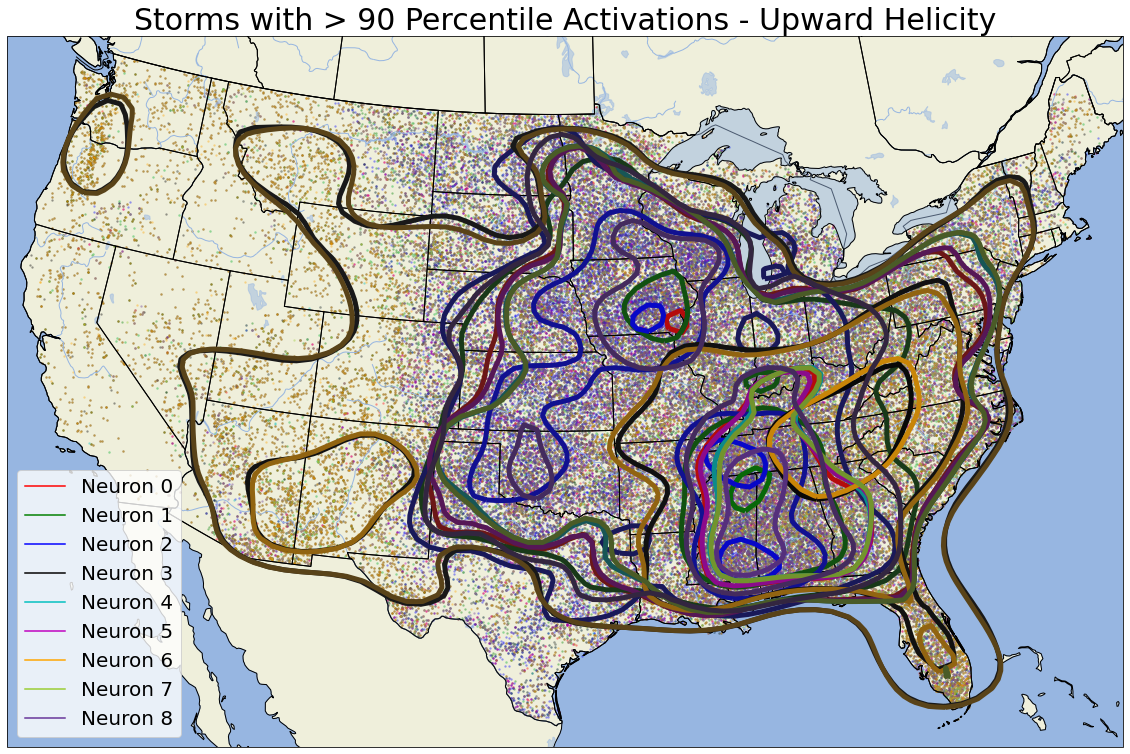

In [7]:
neurons = list(df.columns[-9:])
col = ['r', 'g', 'b', 'k', 'c', 'm', 'orange', 'yellowgreen', 'rebeccapurple']
fig = plt.figure(figsize=(20, 16))
lcc = ccrs.LambertConformal(central_longitude=-97.5, standard_parallels=(38.5, 38.5))
ax = fig.add_subplot(1, 1, 1, projection=lcc)
ax.set_extent([-120, -74, 25, 50], crs=ccrs.PlateCarree()) 
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES)

for i in range(9):
    neuron = neurons[i]
    data = df[df[neuron] > df[neuron].quantile(0.9)]
    #data = df[df[neuron] > 0.1]
    var = data[neuron]
    plt.scatter(data['centroid_lon'], data['centroid_lat'], transform=ccrs.PlateCarree(), label=None, color=col[i], alpha=0.25, s=2.5)
    sns.kdeplot(data['centroid_lon'], data['centroid_lat'], levels=3, transform=ccrs.PlateCarree(), linewidths=5, thresh=0, color=col[i], linestyles='-',
                label=f'Neuron {i}', cummulative=True)
    plt.legend(prop={'size': 20})
plt.title('Storms with > 90 Percentile Activations - Upward Helicity', fontsize=30)
fig.savefig('../images/ML_Storms_greater90_uh.png', bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '../images/kde_dist_uh.png'

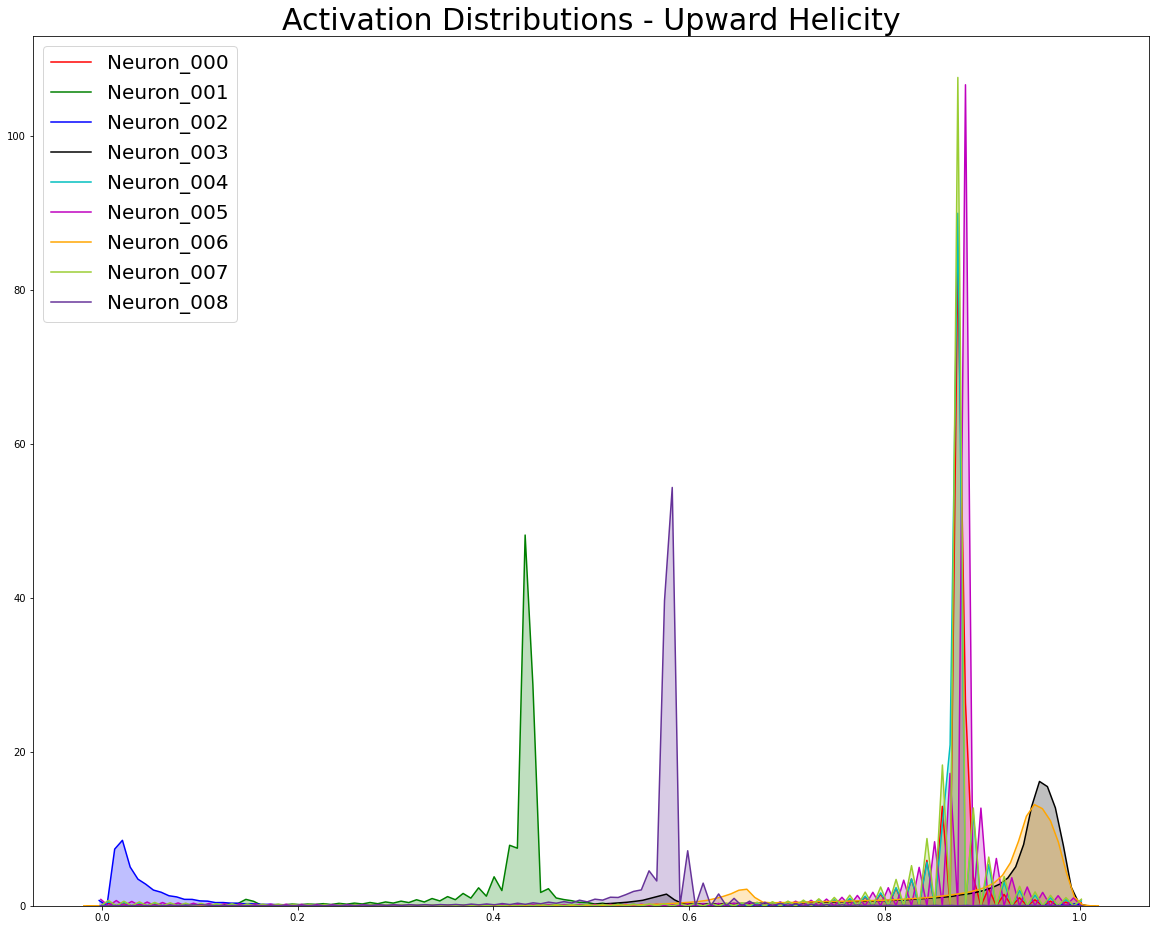

In [8]:
scaler = MinMaxScaler()
s_data = df.iloc[:, -9:]
#s_data = s_data[s_data['neuron_003'] > s_data['neuron_003'].quantile(0.90)]
sdf = pd.DataFrame(scaler.fit_transform(s_data), columns=s_data.columns)
col = ['r', 'g', 'b', 'k', 'c', 'm', 'orange', 'yellowgreen', 'rebeccapurple']

plt.figure(figsize=(20,16))
for i in range(9):
    sns.kdeplot(sdf.iloc[:,i], shade=True, label=f'Neuron_00{i}', color=col[i])
    plt.legend(prop={'size': 20})
plt.ylabel('')
plt.xlabel('')
plt.title('Activation Distributions - Upward Helicity', fontsize=30)
# plt.savefig('../images/kde_dist_uh.png', bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '../images/Diurnal_g50p_uh.png'

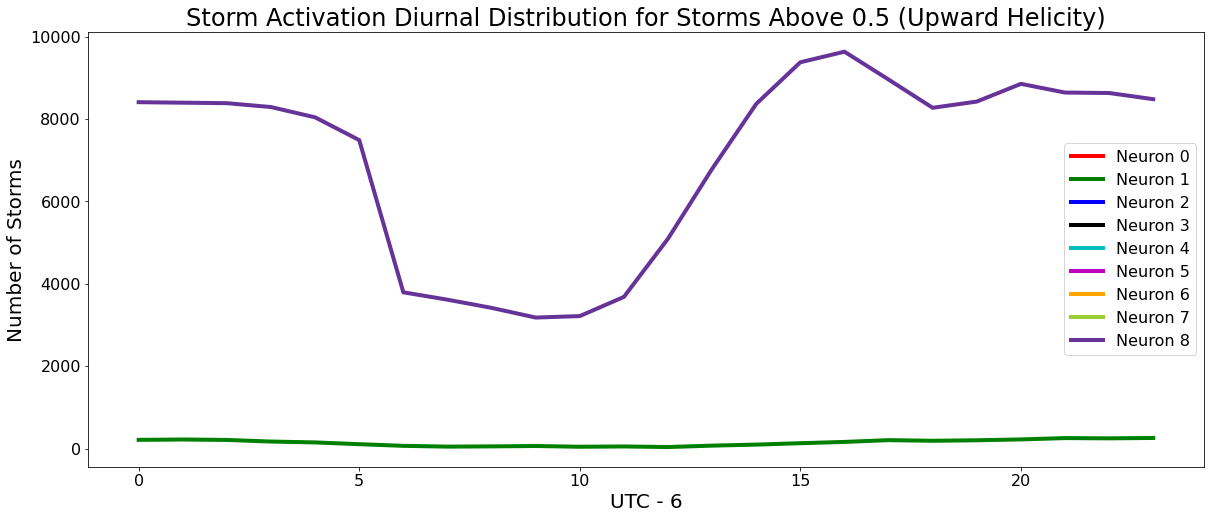

In [9]:
neurons = list(df.columns[-9:])
dff = pd.DataFrame(columns=neurons)
fig, ax = plt.subplots(figsize=(20,8))
col = ['r', 'g', 'b', 'k', 'c', 'm', 'orange', 'yellowgreen', 'rebeccapurple']

for i in range(9):
    neuron = neurons[i]
    #d = df[df[neuron] > df[neuron].quantile(0.50)].groupby(df['time'].dt.hour)[neuron].count()
    d = df[df[neuron] > 0.5].groupby(df['time'].dt.hour)[neuron].count()
    dff[neuron] = d
    im = ax.plot(dff[neuron], linewidth=4, alpha=1, label=f'Neuron {i}', color=col[i])
plt.legend(prop={'size': 16})
plt.title('Storm Activation Diurnal Distribution for Storms Above 0.5 (Upward Helicity)', fontsize=24)
ax.set_ylabel('Number of Storms', fontsize=20)
ax.set_xlabel('UTC - 6', fontsize=20)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.savefig('../images/Diurnal_g50p_uh.png', bbox_inches='tight')

In [10]:
neurons = df.columns[-9:]
l, ids = [], []
for n in neurons:
    t = df[df[n] == df[n].max()]['time'] + pd.Timedelta(6, 'H')
    i = df[df[n] == df[n].max()]['track_id']
    l.append(t)
    ids.append(i)

l, ids

([83086   2014-06-04
  Name: time, dtype: datetime64[ns],
  82955   2014-06-03 23:00:00
  Name: time, dtype: datetime64[ns],
  87111   2014-06-05 12:00:00
  Name: time, dtype: datetime64[ns],
  81068   2014-06-02 01:00:00
  Name: time, dtype: datetime64[ns],
  83228   2014-06-04 01:00:00
  Name: time, dtype: datetime64[ns],
  83086   2014-06-04
  Name: time, dtype: datetime64[ns],
  91168   2014-06-07 06:00:00
  Name: time, dtype: datetime64[ns],
  83228   2014-06-04 01:00:00
  Name: time, dtype: datetime64[ns],
  83090   2014-06-04 01:00:00
  Name: time, dtype: datetime64[ns]],
 [83086    572
  Name: track_id, dtype: int64,
  82955    500
  Name: track_id, dtype: int64,
  87111    391
  Name: track_id, dtype: int64,
  81068    1351
  Name: track_id, dtype: int64,
  83228    656
  Name: track_id, dtype: int64,
  83086    572
  Name: track_id, dtype: int64,
  91168    228
  Name: track_id, dtype: int64,
  83228    656
  Name: track_id, dtype: int64,
  83090    574
  Name: track_id, dtyp